# Lab 02. 시계열 상관 분석 실습
---

In [8]:
import pandas as pd 
import random 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- 각 주식(삼성, LG)의 랜덤 가격 100개를 생성한다.

In [9]:
# 랜덤하게 각 주식의 가격 100개의 데이터 생성 
# 삼성
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')
samsung_prices = [random.randint(80000, 90000) for _ in range(100)]
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

# LG 
lg_prices = [random.randint(140000, 160000) for _ in range(100)]
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

# 두 개의 프레임 합치기 
df = pd.concat([samsung_df, lg_df] , axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']    # 컬럼명 지정하기

- 폴더를 생성하고 `.csv` 파일로 저장한다. 폴더를 생성할 때 `exist_ok=True` 옵션을 적용해주는데, 이것은 이미 폴더가 생성되어 있을 경우 넘어가도록 해준다.

In [10]:
# 폴더 생성 
os.makedirs("./data", exist_ok=True)     # 이미 생성되어 있으면 넘어간다. 

# 저장
df.to_csv("./data/stock_price.csv")

- 생성한 `.csv` 파일을 읽고, 내용을 출력해본다.

In [11]:
# csv 읽기 
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df)

            Samsung      LG
Date                       
2021-01-04    85716  154331
2021-01-05    88865  159667
2021-01-06    84614  158887
2021-01-07    85110  153349
2021-01-08    80834  154348
...             ...     ...
2021-04-09    86216  142787
2021-04-10    80046  143259
2021-04-11    86656  144622
2021-04-12    88081  151847
2021-04-13    88665  147842

[100 rows x 2 columns]


- 두 종목의 수익률을 계산해본다.

In [12]:
# 두 종목의 수익률 계산 
returns = df.pct_change()

print(returns)

             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.036738  0.034575
2021-01-06 -0.047837 -0.004885
2021-01-07  0.005862 -0.034855
2021-01-08 -0.050241  0.006515
...              ...       ...
2021-04-09  0.052185  0.017588
2021-04-10 -0.071564  0.003306
2021-04-11  0.082578  0.009514
2021-04-12  0.016444  0.049958
2021-04-13  0.006630 -0.026375

[100 rows x 2 columns]


- 수익률 간의 상관 계수를 계산해본다.

In [13]:
# 수익률 간의 상관 계수 계산 
corr_matrix = returns.corr()

print(corr_matrix)

          Samsung        LG
Samsung  1.000000  0.045282
LG       0.045282  1.000000


- 히트맵으로 시각화 해본다.

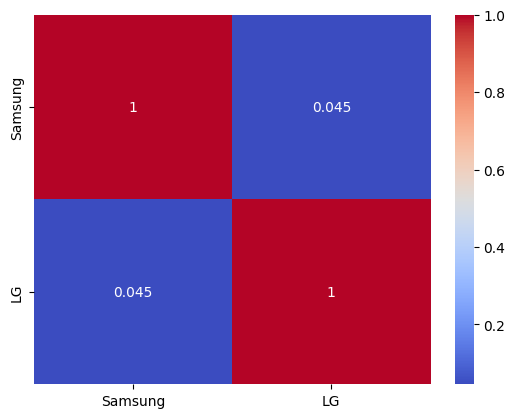

: 

In [14]:
# 히트맵 그리기 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()